In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [2]:
# Load dataset
raw_data_path = "../data/complaints.csv"
df = pd.read_csv(raw_data_path)

# Show first few rows
print("🔹 Sample rows from dataset:")
print(df.head())


C:\Users\ayish\AppData\Local\Temp\ipykernel_9344\3332607674.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_data_path)


🔹 Sample rows from dataset:
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else             

In [3]:
# Show column names and datatypes
print("\n🔹 Column info:")
print(df.info())


🔹 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
me


🔹 Complaint count per product:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                         

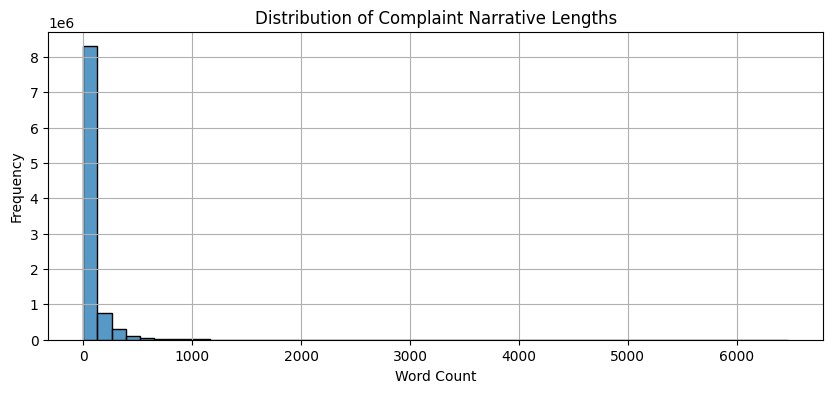

In [4]:
#  Task 1.2 – Perform initial EDA
# --------------------------------
# - Understand the distribution of products
# - Check length of complaint texts
# - Identify missing or empty narratives

# Count product distribution
print("\n🔹 Complaint count per product:")
print(df['Product'].value_counts())

# Add complaint length column (word count)
df['narrative_length'] = df['Consumer complaint narrative'].fillna("").apply(lambda x: len(str(x).split()))

# Plot length distribution
plt.figure(figsize=(10,4))
sns.histplot(df['narrative_length'], bins=50)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [5]:
# Check how many rows have missing or empty narratives
missing_count = df['Consumer complaint narrative'].isnull().sum()
empty_count = (df['Consumer complaint narrative'].fillna("").str.strip() == "").sum()
print(f"\n🔹 Complaints with missing narratives: {missing_count}")
print(f"🔹 Complaints with empty narratives: {empty_count}")


🔹 Complaints with missing narratives: 6629041
🔹 Complaints with empty narratives: 6629041


In [6]:
# 🧠 Task 1.3 – Filter dataset for target products and valid narratives
# --------------------------------------------------------------------
# - Keep only 5 specified product types
# - Remove rows with missing or empty complaint narratives

target_products = [
    'Credit card',
    'Personal loan',
    'Buy Now, Pay Later',
    'Savings account',
    'Money transfers'
]

# Filter by product
df = df[df['Product'].isin(target_products)]

# Drop complaints with null or empty narrative
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

print(f"\n🔹 Filtered dataset size: {df.shape}")
print("🔹 Products retained after filtering:")
print(df['Product'].value_counts())


🔹 Filtered dataset size: (82164, 19)
🔹 Products retained after filtering:
Product
Credit card        80667
Money transfers     1497
Name: count, dtype: int64


In [7]:
# 🧠 Task 1.4 – Clean the text narrative for better embeddings
# ------------------------------------------------------------
# - Lowercase all text
# - Remove special characters
# - Normalize whitespace
# - Remove boilerplate phrases (optional)

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
    return text

# Apply cleaning
df['cleaned_text'] = df['Consumer complaint narrative'].apply(clean_text)

# Preview cleaned result
print("\n🔹 Example cleaned text:")
print(df[['Consumer complaint narrative', 'cleaned_text']].head(3))


🔹 Example cleaned text:
                            Consumer complaint narrative  \
12237  A XXXX XXXX card was opened under my name by a...   
13280  Dear CFPB, I have a secured credit card with c...   
13506  I have a Citi rewards cards. The credit balanc...   

                                            cleaned_text  
12237  a xxxx xxxx card was opened under my name by a...  
13280  dear cfpb i have a secured credit card with ci...  
13506  i have a citi rewards cards the credit balance...  


In [8]:
# 🧠 Task 1.5 – Save the cleaned dataset
# --------------------------------------
# Save the result as `data/filtered_complaints.csv` for Task 2
output_path = "../data/filtered_complaints.csv"
os.makedirs("data", exist_ok=True)
df.to_csv(output_path, index=False)

print(f"\n✅ Cleaned data saved to: {output_path}")



✅ Cleaned data saved to: ../data/filtered_complaints.csv


In [9]:
#load cleaned data
pd =pd.read_csv("../data/filtered_complaints.csv")
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82164 entries, 0 to 82163
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 82164 non-null  object
 1   Product                       82164 non-null  object
 2   Sub-product                   63327 non-null  object
 3   Issue                         82164 non-null  object
 4   Sub-issue                     61770 non-null  object
 5   Consumer complaint narrative  82164 non-null  object
 6   Company public response       39566 non-null  object
 7   Company                       82164 non-null  object
 8   State                         81857 non-null  object
 9   ZIP code                      82164 non-null  object
 10  Tags                          14889 non-null  object
 11  Consumer consent provided?    82164 non-null  object
 12  Submitted via                 82164 non-null  object
 13  Date sent to com